In [14]:
import os
import sys
from copy import deepcopy
from pathlib import Path

import yaml

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [67]:
from mushroom.mushroom import Mushroom, DEFAULT_CONFIG
import mushroom.data.multiplex as multiplex
import mushroom.utils as utils
import mushroom.visualization.utils as vis_utils

In [68]:
run_dir = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow'
mushroom_dir = os.path.join(run_dir, f'mushroom') # where mushroom results will be saved
Path(mushroom_dir).mkdir(parents=True, exist_ok=True)

## specify inputs

In [69]:
metadata = yaml.safe_load(open(os.path.join(run_dir, 'registered', 'metadata.yaml')))
yaml.safe_dump(metadata, sys.stdout)

resolution: 1.0
sections:
- data:
  - dtype: visium
    filepath: /diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s0_S18-9906-U1_visium.h5ad
  - dtype: he
    filepath: /diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s0_S18-9906-U1_he.tif
  position: 0
  sid: S18-9906-U1
- data:
  - dtype: xenium
    filepath: /diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s1_S18-9906-U2_xenium.h5ad
  position: 5
  sid: S18-9906-U2
- data:
  - dtype: multiplex
    filepath: /diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s2_S18-9906-U3_multiplex.ome.tiff
  position: 10
  sid: S18-9906-U3
- data:
  - dtype: xenium
    filepath: /diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s3_S18-9906-U9_xenium.h5ad
  position: 40
  sid: S18-9906-U9
- data:
  - dtype: multiplex
    filepath: /diskmnt/Projects/Users/

In [70]:
DEFAULT_CONFIG

{'sections': None,
 'dtype_to_chkpt': None,
 'dtype_specific_params': None,
 'sae_kwargs': {'size': 8,
  'patch_size': 1,
  'encoder_dim': 128,
  'codebook_dim': 64,
  'num_clusters': (8, 4, 2),
  'dtype_to_decoder_dims': {'multiplex': (256, 128, 64),
   'he': (256, 128, 10),
   'visium': (256, 512, 2048),
   'xenium': (256, 256, 256),
   'cosmx': (256, 512, 1024),
   'points': (256, 512, 1024)},
  'recon_scaler': 1.0,
  'neigh_scaler': 0.01},
 'trainer_kwargs': {'input_resolution': 1.0,
  'target_resolution': 0.02,
  'pct_expression': 0.05,
  'batch_size': 128,
  'num_workers': 1,
  'devices': 1,
  'accelerator': 'cpu',
  'max_epochs': 1,
  'steps_per_epoch': 1000,
  'lr': 0.0001,
  'out_dir': './outputs',
  'save_every': 1,
  'log_every_n_steps': 10,
  'logger_type': 'tensorboard',
  'logger_project': 'portobello',
  'channel_mapping': {}}}

In [71]:
config = deepcopy(DEFAULT_CONFIG)
config = utils.recursive_update(config, {
    'sections': metadata['sections'],
    'trainer_kwargs': {
        'input_resolution': metadata['resolution'],
        'target_resolution': metadata['resolution'] / 50.,
        'out_dir': os.path.join(mushroom_dir, 'outputs'),
    }
})
config

{'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s0_S18-9906-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s0_S18-9906-U1_he.tif'}],
   'position': 0,
   'sid': 'S18-9906-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s1_S18-9906-U2_xenium.h5ad'}],
   'position': 5,
   'sid': 'S18-9906-U2'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s2_S18-9906-U3_multiplex.ome.tiff'}],
   'position': 10,
   'sid': 'S18-9906-U3'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s3_S18-9906-U9_xenium.h5ad'}],
   'position'

In [72]:
# fps = [mapping['filepath'] 
#        for item in config['sections']
#        for mapping in item['data']
#        if 'multiplex' == mapping['dtype']]
# multiplex.get_channel_counts(fps)

In [73]:
config['dtype_specific_params'] = {
    'visium': {
        'trainer_kwargs': {
            'target_resolution': .01 # lower resolution for visium
        }
    }
}
config

{'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s0_S18-9906-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s0_S18-9906-U1_he.tif'}],
   'position': 0,
   'sid': 'S18-9906-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s1_S18-9906-U2_xenium.h5ad'}],
   'position': 5,
   'sid': 'S18-9906-U2'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s2_S18-9906-U3_multiplex.ome.tiff'}],
   'position': 10,
   'sid': 'S18-9906-U3'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/registered/s3_S18-9906-U9_xenium.h5ad'}],
   'position'

## train mushroom

In [74]:
mushroom = Mushroom.from_config(config)

INFO:root:loading spore for he
INFO:root:starting he processing
INFO:root:2 sections detected: ['S18-9906-U1', 'S18-9906-U16']
INFO:root:processing sections
INFO:root:generating image data for section S18-9906-U1
INFO:root:generating image data for section S18-9906-U16
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 2 sections detected: [('S18-9906-U1', 'he'), ('S18-9906-U16', 'he')]
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:model initialized
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
INFO:root:loading spore for multiplex
INFO:root:starting multiplex processing
INFO:root:using 24 channels
INFO:root:4 sections detected: ['S18-9906-U3', 'S18-9906-U10', 'S18-9906-U18', 'S18-9906-U25']
INFO:root:processing sections
INFO:root:generating image data for section S18-9906-U3
INFO:root:generating image data for section S18-

In [77]:
mushroom.section_ids

[('S18-9906-U1', 'visium'),
 ('S18-9906-U1', 'he'),
 ('S18-9906-U2', 'xenium'),
 ('S18-9906-U3', 'multiplex'),
 ('S18-9906-U9', 'xenium'),
 ('S18-9906-U10', 'multiplex'),
 ('S18-9906-U16', 'visium'),
 ('S18-9906-U16', 'he'),
 ('S18-9906-U17', 'xenium'),
 ('S18-9906-U18', 'multiplex'),
 ('S18-9906-U24', 'xenium'),
 ('S18-9906-U25', 'multiplex')]

In [78]:
mushroom.train()

INFO:root:starting training for he
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /diskmnt/Projects/Users/estorrs/miniconda3/envs/mush ...
Missing logger folder: /diskmnt/Projects/Users/estorrs/mushroom/data/projects/examples/full_workflow/mushroom/outputs/he_logs/lightning_logs

  | Name | Type | Params
------------------------------
0 | sae  | SAE  | 5.0 M 
------------------------------
5.0 M     Trainable params
0         Non-trainable params
5.0 M     Total params
19.868    Total estimated model params size (MB)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be 

Training: |                                                                                         | 0/? [00:…

`Trainer.fit` stopped: `max_epochs=1` reached.
Traceback (most recent call last):
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 688, in _rmtree_s

Training: |                                                                                         | 0/? [00:…

`Trainer.fit` stopped: `max_epochs=1` reached.
Traceback (most recent call last):
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 688, in _rmtree_s

Training: |                                                                                         | 0/? [00:…

`Trainer.fit` stopped: `max_epochs=1` reached.
Traceback (most recent call last):
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 688, in _rmtree_s

Training: |                                                                                         | 0/? [00:…

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [82]:
mushroom.embed_sections()

INFO:root:embedding he spore


Predicting: |                                                                                                 …

Traceback (most recent call last):
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)


predicted_pixels 3 2 (172, 172, 3)
true_pixels 2 (172, 172, 3)
clusters 3 (2, 172, 172)
agg_clusters 3 (2, 172, 172)
cluster_probs_agg 3 (2, 172, 172, 8)
cluster_to_agg 3 {0: (0,)}
cluster_probs 3 (2, 172, 172, 1) <class 'list'>
cluster_probs_all 3 (2, 172, 172, 8) <class 'list'>
cluster_probs 3 (2, 172, 172, 1) <class 'list'>
cluster_probs_all 3 (2, 172, 172, 8, 4) <class 'list'>
cluster_probs 3 (2, 172, 172, 1) <class 'list'>
cluster_probs_all 3 (2, 172, 172, 8, 4, 2) <class 'list'>


Predicting: |                                                                                                 …

Traceback (most recent call last):
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)


predicted_pixels 3 4 (172, 172, 24)
true_pixels 4 (172, 172, 24)
clusters 3 (4, 172, 172)
agg_clusters 3 (4, 172, 172)
cluster_probs_agg 3 (4, 172, 172, 8)
cluster_to_agg 3 {0: (0,)}
cluster_probs 3 (4, 172, 172, 1) <class 'list'>
cluster_probs_all 3 (4, 172, 172, 8) <class 'list'>
cluster_probs 3 (4, 172, 172, 1) <class 'list'>
cluster_probs_all 3 (4, 172, 172, 8, 4) <class 'list'>
cluster_probs 3 (4, 172, 172, 1) <class 'list'>
cluster_probs_all 3 (4, 172, 172, 8, 4, 2) <class 'list'>


Predicting: |                                                                                                 …

Traceback (most recent call last):
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)


predicted_pixels 3 2 (84, 84, 8587)
true_pixels 2 (84, 84, 8587)
clusters 3 (2, 84, 84)
agg_clusters 3 (2, 84, 84)
cluster_probs_agg 3 (2, 84, 84, 8)
cluster_to_agg 3 {0: (0,)}
cluster_probs 3 (2, 84, 84, 1) <class 'list'>
cluster_probs_all 3 (2, 84, 84, 8) <class 'list'>
cluster_probs 3 (2, 84, 84, 1) <class 'list'>
cluster_probs_all 3 (2, 84, 84, 8, 4) <class 'list'>
cluster_probs 3 (2, 84, 84, 1) <class 'list'>
cluster_probs_all 3 (2, 84, 84, 8, 4, 2) <class 'list'>


INFO:root:embedding xenium spore


Predicting: |                                                                                                 …

Traceback (most recent call last):
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)


predicted_pixels 3 4 (172, 172, 377)
true_pixels 4 (172, 172, 377)
clusters 3 (4, 172, 172)
agg_clusters 3 (4, 172, 172)
cluster_probs_agg 3 (4, 172, 172, 8)
cluster_to_agg 3 {0: (0,)}
cluster_probs 3 (4, 172, 172, 1) <class 'list'>
cluster_probs_all 3 (4, 172, 172, 8) <class 'list'>
cluster_probs 3 (4, 172, 172, 1) <class 'list'>
cluster_probs_all 3 (4, 172, 172, 8, 4) <class 'list'>
cluster_probs 3 (4, 172, 172, 1) <class 'list'>
cluster_probs_all 3 (4, 172, 172, 8, 4, 2) <class 'list'>


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

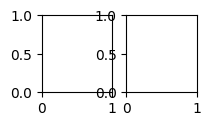

In [84]:
spore = mushroom.dtype_to_spore['he']
spore.display_cluster_probs()

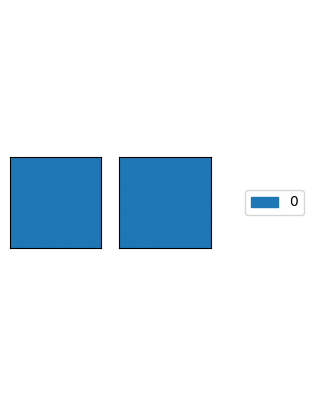

In [86]:
spore.display_clusters()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

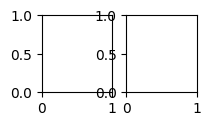

In [85]:
mushroom.display_cluster_probs('he')

In [75]:
mushroom.dtype_to_spore['visium'].target_ppm

0.01

In [76]:
mushroom.dtype_to_spore['visium'].res_scaler

2.0